# ShadowFox
## Data Science Internship
## Name: Pavithiran.V
### Task 3 Task Level (Hard)

Present your findings on the final project, where you are tasked with
creating a Jupyter notebook from scratch and conducting a data
analysis on a dataset of your choice. This comprehensive process
involves selecting a dataset that piques your interest, exploring its
contents within a Jupyter notebook, and identifying research questions
that the data might help answer.

## Movies DataSet Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/all-movies-on-imdb/movies.csv')

In [3]:
df.head()

,Movie URL,Title,Poster,Release Year,Length in Min,IMDB Rating,Rating Count,Plot,Directors,Writers,Stars,Genres
0,https://www.imdb.com/title/tt0001892/?ref_=sr_t_3,Den sorte drøm,https://m.media-amazon.com/images/M/MV5BZjg0Yj...,1911.0,53.0,5.8,265.0,Two men of high rank are both wooing the beaut...,Urban Gad|,Urban Gad|Gebhard Schätzler-Perasini|,Asta Nielsen|Valdemar Psilander|Gunnar Helseng...,Drama
1,https://www.imdb.com/title/tt0001964/?ref_=sr_t_6,Die Verräterin,https://m.media-amazon.com/images/M/MV5BNjI2Nj...,1911.0,48.0,5.9,100.0,A woman betrays the regiment location in which...,Urban Gad,Erich Zeiske|,Asta Nielsen|Max Obal|Robert Valberg,Drama
2,https://www.imdb.com/title/tt0002101/?ref_=sr_t_1,Cleopatra,https://m.media-amazon.com/images/M/MV5BZTcyMG...,1912.0,100.0,5.1,620.0,The fabled queen of Egypt's affair with Roman ...,Charles L. Gaskill|,Victorien Sardou|Charles L. Gaskill|,Helen Gardner|Pearl Sindelar|Miss Fielding,Drama|History
3,https://www.imdb.com/title/tt0002130/?ref_=sr_t_1,L'Inferno,https://m.media-amazon.com/images/M/MV5BMzY0NT...,1911.0,71.0,7.0,3500.0,Loosely adapted from Dante's Divine Comedy and...,Francesco Bertolini|Adolfo Padovan|Giuseppe de...,Dante Alighieri|,Salvatore Papa|Arturo Pirovano|Giuseppe de Lig...,Adventure|Drama|Fantasy
4,https://www.imdb.com/title/tt0002186/?ref_=sr_t_6,Den flyvende cirkus,https://m.media-amazon.com/images/M/MV5BZTljZD...,1912.0,46.0,6.4,145.0,The Flying Circus was the largest traveling ar...,Alfred Lind|,Carl Otto Dumreicher|Alfred Lind|,Rasmus Ottesen|Emilie Otterdahl|Lili Beck,Drama


### Pre-Processing

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Movie URL           0
Title              65
Poster            307
Release Year       73
Length in Min    1958
IMDB Rating        67
Rating Count       67
Plot               65
Directors         849
Writers          7057
Stars            1352
Genres            176
dtype: int64


In [5]:
df.shape

(126691, 12)

In [6]:
# Fill or drop missing values as appropriate
# For simplicity, let's drop rows with any missing values for now
movies_df_cleaned = df.dropna()
print("Shape after dropping missing values:", movies_df_cleaned.shape)

Shape after dropping missing values: (117855, 12)


In [7]:
movies_df_cleaned.dtypes

Movie URL         object
Title             object
Poster            object
Release Year     float64
Length in Min    float64
IMDB Rating      float64
Rating Count     float64
Plot              object
Directors         object
Writers           object
Stars             object
Genres            object
dtype: object

In [8]:
movies_df_cleaned['Release Year'] = movies_df_cleaned['Release Year'].astype(int)
movies_df_cleaned['Length in Min'] = movies_df_cleaned['Length in Min'].astype(int)
movies_df_cleaned['IMDB Rating'] = movies_df_cleaned['IMDB Rating'].astype(float)
movies_df_cleaned['Rating Count'] = movies_df_cleaned['Rating Count'].astype(int)

/tmp/ipykernel_33/966349671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df_cleaned['Release Year'] = movies_df_cleaned['Release Year'].astype(int)
/tmp/ipykernel_33/966349671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df_cleaned['Length in Min'] = movies_df_cleaned['Length in Min'].astype(int)
/tmp/ipykernel_33/966349671.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [9]:
movies_df_cleaned.dtypes

Movie URL         object
Title             object
Poster            object
Release Year       int64
Length in Min      int64
IMDB Rating      float64
Rating Count       int64
Plot              object
Directors         object
Writers           object
Stars             object
Genres            object
dtype: object

In [10]:
# Remove duplicate row
movies_df_cleaned = movies_df_cleaned.drop_duplicates()
print("Shape after removing duplicates:", movies_df_cleaned.shape)

Shape after removing duplicates: (117855, 12)


In [11]:
movies_df_cleaned.columns

Index(['Movie URL', 'Title', 'Poster', 'Release Year', 'Length in Min',
       'IMDB Rating', 'Rating Count', 'Plot', 'Directors', 'Writers', 'Stars',
       'Genres'],
      dtype='object')

In [12]:
movies_df_cleaned['Primary Director'] = movies_df_cleaned['Directors'].apply(lambda x: x.split('|')[0].strip())
movies_df_cleaned['Primary Writer'] = movies_df_cleaned['Writers'].apply(lambda x: x.split('|')[0].strip())
movies_df_cleaned['Primary Star'] = movies_df_cleaned['Stars'].apply(lambda x: x.split('|')[0].strip())

In [13]:
movies_df_cleaned.columns

Index(['Movie URL', 'Title', 'Poster', 'Release Year', 'Length in Min',
       'IMDB Rating', 'Rating Count', 'Plot', 'Directors', 'Writers', 'Stars',
       'Genres', 'Primary Director', 'Primary Writer', 'Primary Star'],
      dtype='object')

In [14]:
movies_df_cleaned.head()

,Movie URL,Title,Poster,Release Year,Length in Min,IMDB Rating,Rating Count,Plot,Directors,Writers,Stars,Genres,Primary Director,Primary Writer,Primary Star
0,https://www.imdb.com/title/tt0001892/?ref_=sr_t_3,Den sorte drøm,https://m.media-amazon.com/images/M/MV5BZjg0Yj...,1911,53,5.8,265,Two men of high rank are both wooing the beaut...,Urban Gad|,Urban Gad|Gebhard Schätzler-Perasini|,Asta Nielsen|Valdemar Psilander|Gunnar Helseng...,Drama,Urban Gad,Urban Gad,Asta Nielsen
1,https://www.imdb.com/title/tt0001964/?ref_=sr_t_6,Die Verräterin,https://m.media-amazon.com/images/M/MV5BNjI2Nj...,1911,48,5.9,100,A woman betrays the regiment location in which...,Urban Gad,Erich Zeiske|,Asta Nielsen|Max Obal|Robert Valberg,Drama,Urban Gad,Erich Zeiske,Asta Nielsen
2,https://www.imdb.com/title/tt0002101/?ref_=sr_t_1,Cleopatra,https://m.media-amazon.com/images/M/MV5BZTcyMG...,1912,100,5.1,620,The fabled queen of Egypt's affair with Roman ...,Charles L. Gaskill|,Victorien Sardou|Charles L. Gaskill|,Helen Gardner|Pearl Sindelar|Miss Fielding,Drama|History,Charles L. Gaskill,Victorien Sardou,Helen Gardner
3,https://www.imdb.com/title/tt0002130/?ref_=sr_t_1,L'Inferno,https://m.media-amazon.com/images/M/MV5BMzY0NT...,1911,71,7.0,3500,Loosely adapted from Dante's Divine Comedy and...,Francesco Bertolini|Adolfo Padovan|Giuseppe de...,Dante Alighieri|,Salvatore Papa|Arturo Pirovano|Giuseppe de Lig...,Adventure|Drama|Fantasy,Francesco Bertolini,Dante Alighieri,Salvatore Papa
4,https://www.imdb.com/title/tt0002186/?ref_=sr_t_6,Den flyvende cirkus,https://m.media-amazon.com/images/M/MV5BZTljZD...,1912,46,6.4,145,The Flying Circus was the largest traveling ar...,Alfred Lind|,Carl Otto Dumreicher|Alfred Lind|,Rasmus Ottesen|Emilie Otterdahl|Lili Beck,Drama,Alfred Lind,Carl Otto Dumreicher,Rasmus Ottesen


In [15]:
# For now, let's just ensure that 'Plot' text is cleaned of any excessive whitespace
movies_df_cleaned['Plot'] = movies_df_cleaned['Plot'].str.strip()

In [16]:
movies_df_cleaned

,Movie URL,Title,Poster,Release Year,Length in Min,IMDB Rating,Rating Count,Plot,Directors,Writers,Stars,Genres,Primary Director,Primary Writer,Primary Star
0,https://www.imdb.com/title/tt0001892/?ref_=sr_t_3,Den sorte drøm,https://m.media-amazon.com/images/M/MV5BZjg0Yj...,1911,53,5.8,265,Two men of high rank are both wooing the beaut...,Urban Gad|,Urban Gad|Gebhard Schätzler-Perasini|,Asta Nielsen|Valdemar Psilander|Gunnar Helseng...,Drama,Urban Gad,Urban Gad,Asta Nielsen
1,https://www.imdb.com/title/tt0001964/?ref_=sr_t_6,Die Verräterin,https://m.media-amazon.com/images/M/MV5BNjI2Nj...,1911,48,5.9,100,A woman betrays the regiment location in which...,Urban Gad,Erich Zeiske|,Asta Nielsen|Max Obal|Robert Valberg,Drama,Urban Gad,Erich Zeiske,Asta Nielsen
2,https://www.imdb.com/title/tt0002101/?ref_=sr_t_1,Cleopatra,https://m.media-amazon.com/images/M/MV5BZTcyMG...,1912,100,5.1,620,The fabled queen of Egypt's affair with Roman ...,Charles L. Gaskill|,Victorien Sardou|Charles L. Gaskill|,Helen Gardner|Pearl Sindelar|Miss Fielding,Drama|History,Charles L. Gaskill,Victorien Sardou,Helen Gardner
3,https://www.imdb.com/title/tt0002130/?ref_=sr_t_1,L'Inferno,https://m.media-amazon.com/images/M/MV5BMzY0NT...,1911,71,7.0,3500,Loosely adapted from Dante's Divine Comedy and...,Francesco Bertolini|Adolfo Padovan|Giuseppe de...,Dante Alighieri|,Salvatore Papa|Arturo Pirovano|Giuseppe de Lig...,Adventure|Drama|Fantasy,Francesco Bertolini,Dante Alighieri,Salvatore Papa
4,https://www.imdb.com/title/tt0002186/?ref_=sr_t_6,Den flyvende cirkus,https://m.media-amazon.com/images/M/MV5BZTljZD...,1912,46,6.4,145,The Flying Circus was the largest traveling ar...,Alfred Lind|,Carl Otto Dumreicher|Alfred Lind|,Rasmus Ottesen|Emilie Otterdahl|Lili Beck,Drama,Alfred Lind,Carl Otto Dumreicher,Rasmus Ottesen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126684,https://www.imdb.com/title/tt27873958/?ref_=sr...,El Ruby House,https://m.media-amazon.com/images/M/MV5BNTBjMW...,2023,101,6.7,1400,When a private family event gets leaked on soc...,Peter Mimi|,Reem El-Qamash|Mohamed el-Dabah|,Karim Abdel Aziz|Kareem Mahmoud Abdel Aziz|Nour,Comedy|Drama,Peter Mimi,Reem El-Qamash,Karim Abdel Aziz
126686,https://www.imdb.com/title/tt2787570/?ref_=sr_...,Den allvarsamma leken,https://m.media-amazon.com/images/M/MV5BODRjOW...,2016,115,6.4,1400,"An adaptation of Hjalmar Söderberg's novel ""Th...",Pernilla August|,Hjalmar Söderberg|Lone Scherfig|Hjalmar Söderb...,Sverrir Gudnason|Karin Franz Körlof|Liv Mjönes,Drama|Romance,Pernilla August,Hjalmar Söderberg,Sverrir Gudnason
126687,https://www.imdb.com/title/tt27876411/?ref_=sr...,Pan Samochodzik i templariusze,https://m.media-amazon.com/images/M/MV5BNGY1Nz...,2023,110,4.3,1300,When an art historian finds an ancient Templar...,Antoni Nykowski|,Bartosz Sztybor|Antoni Nykowski|Zbigniew Niena...,Mateusz Janicki|Sandra Drzymalska|Maria Debska,Adventure|Drama|Family,Antoni Nykowski,Bartosz Sztybor,Mateusz Janicki
126688,https://www.imdb.com/title/tt2787824/?ref_=sr_...,Goal of the Dead,https://m.media-amazon.com/images/M/MV5BMjcxNz...,2014,140,5.5,1600,A professional football team arrives at their ...,Thierry Poiraud|Benjamin Rocher|,Tristan Schulmann|Nicolas Peufaillit|Quoc Dang...,Alban Lenoir|Charlie Bruneau|Tiphaine Daviot,Comedy|Horror,Thierry Poiraud,Tristan Schulmann,Alban Lenoir


In [17]:
# Encoding genres 
unique_genres = set()
for genres in movies_df_cleaned['Genres']:
    for genre in genres.split('|'):
        unique_genres.add(genre.strip())
for genre in unique_genres:
    movies_df_cleaned[f'Genre_{genre}'] = movies_df_cleaned['Genres'].apply(lambda x: 1 if genre in x else 0)

In [18]:
movies_df_cleaned.head()

,Movie URL,Title,Poster,Release Year,Length in Min,IMDB Rating,Rating Count,Plot,Directors,Writers,...,Genre_Drama,Genre_Horror,Genre_Sci-Fi,Genre_Thriller,Genre_News,Genre_History,Genre_Film-Noir,Genre_Sport,Genre_Fantasy,Genre_Family
0,https://www.imdb.com/title/tt0001892/?ref_=sr_t_3,Den sorte drøm,https://m.media-amazon.com/images/M/MV5BZjg0Yj...,1911,53,5.8,265,Two men of high rank are both wooing the beaut...,Urban Gad|,Urban Gad|Gebhard Schätzler-Perasini|,...,1,0,0,0,0,0,0,0,0,0
1,https://www.imdb.com/title/tt0001964/?ref_=sr_t_6,Die Verräterin,https://m.media-amazon.com/images/M/MV5BNjI2Nj...,1911,48,5.9,100,A woman betrays the regiment location in which...,Urban Gad,Erich Zeiske|,...,1,0,0,0,0,0,0,0,0,0
2,https://www.imdb.com/title/tt0002101/?ref_=sr_t_1,Cleopatra,https://m.media-amazon.com/images/M/MV5BZTcyMG...,1912,100,5.1,620,The fabled queen of Egypt's affair with Roman ...,Charles L. Gaskill|,Victorien Sardou|Charles L. Gaskill|,...,1,0,0,0,0,1,0,0,0,0
3,https://www.imdb.com/title/tt0002130/?ref_=sr_t_1,L'Inferno,https://m.media-amazon.com/images/M/MV5BMzY0NT...,1911,71,7.0,3500,Loosely adapted from Dante's Divine Comedy and...,Francesco Bertolini|Adolfo Padovan|Giuseppe de...,Dante Alighieri|,...,1,0,0,0,0,0,0,0,1,0
4,https://www.imdb.com/title/tt0002186/?ref_=sr_t_6,Den flyvende cirkus,https://m.media-amazon.com/images/M/MV5BZTljZD...,1912,46,6.4,145,The Flying Circus was the largest traveling ar...,Alfred Lind|,Carl Otto Dumreicher|Alfred Lind|,...,1,0,0,0,0,0,0,0,0,0


In [19]:
movies_df_cleaned.shape

(117855, 40)

In [20]:
movies_df_cleaned[(movies_df_cleaned['Genre_Crime'] == 1) & (movies_df_cleaned['Genre_Thriller'] == 1)]

,Movie URL,Title,Poster,Release Year,Length in Min,IMDB Rating,Rating Count,Plot,Directors,Writers,...,Genre_Drama,Genre_Horror,Genre_Sci-Fi,Genre_Thriller,Genre_News,Genre_History,Genre_Film-Noir,Genre_Sport,Genre_Fantasy,Genre_Family
195,https://www.imdb.com/title/tt0009894/?ref_=sr_...,El automóvil gris,https://m.media-amazon.com/images/M/MV5BMTdjOD...,1919,223,7.0,235,A gang terrorize Mexico City's high society in...,Enrique Rosas|,Juan Manuel Cabrera|Miguel Necoechea|José Manu...,...,0,0,0,1,0,0,0,0,0,0
197,https://www.imdb.com/title/tt0009905/?ref_=sr_...,Barrabas,https://m.media-amazon.com/images/M/MV5BYmJmOG...,1919,489,7.6,112,The efforts of lawyer Jacques Varese and journ...,Louis Feuillade|,Louis Feuillade|Maurice Level|,...,0,0,0,1,0,0,0,0,0,0
287,https://www.imdb.com/title/tt0011565/?ref_=sr_t_8,The Penalty,https://m.media-amazon.com/images/M/MV5BNTZhZT...,1920,90,7.4,2600,A deformed criminal mastermind plans to loot t...,Wallace Worsley|,Gouverneur Morris|Charles Kenyon|Philip Lonergan|,...,1,0,0,1,0,0,0,0,0,0
343,https://www.imdb.com/title/tt0012538/?ref_=sr_...,Outside the Law,https://m.media-amazon.com/images/M/MV5BZmIxNj...,1920,75,6.5,741,In this early collaboration with director Tod ...,Tod Browning|,Gardner Bradford|Tod Browning|Lucien Hubbard|,...,0,0,0,1,0,0,0,0,0,0
368,https://www.imdb.com/title/tt0013086/?ref_=sr_t_3,"Dr. Mabuse, der Spieler",https://m.media-amazon.com/images/M/MV5BYjhkM2...,1922,242,7.8,9200,Arch-criminal Dr. Mabuse sets out to make a fo...,Fritz Lang|,Norbert Jacques|Thea von Harbou|Fritz Lang|,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126583,https://www.imdb.com/title/tt2778412/?ref_=sr_...,Naanayam,https://m.media-amazon.com/images/M/MV5BMmFiMm...,2010,136,6.6,196,Ravi is an electronics engineer who works in a...,Shakthi S. Rajan|,Shakthi S. Rajan|Shakti Soundar Rajan|,...,0,0,0,1,0,0,0,0,0,0
126596,https://www.imdb.com/title/tt27795981/?ref_=sr...,Budak Flat,https://m.media-amazon.com/images/M/MV5BZGUxMz...,2023,104,5.3,116,The rivalry between two criminal brothers find...,Ming Jin Woo|Syafiq Yusof|Eugene Lim|,Nazri Vovinski|June Tan|,...,0,0,0,1,0,0,0,0,0,0
126604,https://www.imdb.com/title/tt27801630/?ref_=sr...,Akmadeul,https://m.media-amazon.com/images/M/MV5BMDg3NT...,2023,105,5.8,471,A determined homicide detective assigned to ta...,Kim Jae-hoon,Kim Jae-hoon|,...,0,0,0,1,0,0,0,0,0,0
126679,https://www.imdb.com/title/tt2786780/?ref_=sr_...,House of the Witchdoctor,https://m.media-amazon.com/images/M/MV5BMzc0MT...,2013,81,4.2,575,Two criminals go on a killing spree that leads...,Devon Mikolas,Devon Mikolas|,...,0,1,0,1,0,0,0,0,0,0


### Exploratory Data Analysis

In [21]:
# Display the first few rows of the dataset
movies_df_cleaned.head()

,Movie URL,Title,Poster,Release Year,Length in Min,IMDB Rating,Rating Count,Plot,Directors,Writers,...,Genre_Drama,Genre_Horror,Genre_Sci-Fi,Genre_Thriller,Genre_News,Genre_History,Genre_Film-Noir,Genre_Sport,Genre_Fantasy,Genre_Family
0,https://www.imdb.com/title/tt0001892/?ref_=sr_t_3,Den sorte drøm,https://m.media-amazon.com/images/M/MV5BZjg0Yj...,1911,53,5.8,265,Two men of high rank are both wooing the beaut...,Urban Gad|,Urban Gad|Gebhard Schätzler-Perasini|,...,1,0,0,0,0,0,0,0,0,0
1,https://www.imdb.com/title/tt0001964/?ref_=sr_t_6,Die Verräterin,https://m.media-amazon.com/images/M/MV5BNjI2Nj...,1911,48,5.9,100,A woman betrays the regiment location in which...,Urban Gad,Erich Zeiske|,...,1,0,0,0,0,0,0,0,0,0
2,https://www.imdb.com/title/tt0002101/?ref_=sr_t_1,Cleopatra,https://m.media-amazon.com/images/M/MV5BZTcyMG...,1912,100,5.1,620,The fabled queen of Egypt's affair with Roman ...,Charles L. Gaskill|,Victorien Sardou|Charles L. Gaskill|,...,1,0,0,0,0,1,0,0,0,0
3,https://www.imdb.com/title/tt0002130/?ref_=sr_t_1,L'Inferno,https://m.media-amazon.com/images/M/MV5BMzY0NT...,1911,71,7.0,3500,Loosely adapted from Dante's Divine Comedy and...,Francesco Bertolini|Adolfo Padovan|Giuseppe de...,Dante Alighieri|,...,1,0,0,0,0,0,0,0,1,0
4,https://www.imdb.com/title/tt0002186/?ref_=sr_t_6,Den flyvende cirkus,https://m.media-amazon.com/images/M/MV5BZTljZD...,1912,46,6.4,145,The Flying Circus was the largest traveling ar...,Alfred Lind|,Carl Otto Dumreicher|Alfred Lind|,...,1,0,0,0,0,0,0,0,0,0


In [22]:
# Display the dataset's basic information
movies_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117855 entries, 0 to 126690
Data columns (total 40 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Movie URL          117855 non-null  object 
 1   Title              117855 non-null  object 
 2   Poster             117855 non-null  object 
 3   Release Year       117855 non-null  int64  
 4   Length in Min      117855 non-null  int64  
 5   IMDB Rating        117855 non-null  float64
 6   Rating Count       117855 non-null  int64  
 7   Plot               117855 non-null  object 
 8   Directors          117855 non-null  object 
 9   Writers            117855 non-null  object 
 10  Stars              117855 non-null  object 
 11  Genres             117855 non-null  object 
 12  Primary Director   117855 non-null  object 
 13  Primary Writer     117855 non-null  object 
 14  Primary Star       117855 non-null  object 
 15  Genre_Documentary  117855 non-null  int64  
 16  Genre_C

In [23]:
# Display summary statistics for numerical columns
movies_df_cleaned.describe()

,Release Year,Length in Min,IMDB Rating,Rating Count,Genre_Documentary,Genre_Comedy,Genre_Western,Genre_Adventure,Genre_Romance,Genre_Action,...,Genre_Drama,Genre_Horror,Genre_Sci-Fi,Genre_Thriller,Genre_News,Genre_History,Genre_Film-Noir,Genre_Sport,Genre_Fantasy,Genre_Family
count,117855.000000,117855.000000,117855.000000,1.178550e+05,117855.000000,117855.000000,117855.000000,117855.000000,117855.000000,117855.000000,...,117855.000000,117855.000000,117855.000000,117855.000000,117855.000000,117855.000000,117855.000000,117855.000000,117855.000000,117855.000000
mean,1996.530516,99.981579,5.876370,9.398987e+03,0.052463,0.320470,0.020593,0.083153,0.153299,0.140121,...,0.537567,0.112206,0.038047,0.128819,0.000908,0.031174,0.006941,0.014620,0.042646,0.046430
std,24.895049,128.702505,1.255486,5.815668e+04,0.222959,0.466659,0.142018,0.276115,0.360277,0.347114,...,0.498589,0.315621,0.191310,0.335001,0.030118,0.173788,0.083022,0.120025,0.202058,0.210415
min,1911.000000,21.000000,1.000000,9.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1982.000000,87.000000,5.200000,2.080000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2006.000000,95.000000,6.100000,5.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,108.000000,6.800000,1.800000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2023.000000,43200.000000,9.800000,2.900000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
# Check for missing values
movies_df_cleaned.isnull().sum()

Movie URL            0
Title                0
Poster               0
Release Year         0
Length in Min        0
IMDB Rating          0
Rating Count         0
Plot                 0
Directors            0
Writers              0
Stars                0
Genres               0
Primary Director     0
Primary Writer       0
Primary Star         0
Genre_Documentary    0
Genre_Comedy         0
Genre_Western        0
Genre_Adventure      0
Genre_Romance        0
Genre_Action         0
Genre_Musical        0
Genre_War            0
Genre_Music          0
Genre_Biography      0
Genre_Talk-Show      0
Genre_Mystery        0
Genre_Reality-TV     0
Genre_Animation      0
Genre_Crime          0
Genre_Drama          0
Genre_Horror         0
Genre_Sci-Fi         0
Genre_Thriller       0
Genre_News           0
Genre_History        0
Genre_Film-Noir      0
Genre_Sport          0
Genre_Fantasy        0
Genre_Family         0
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


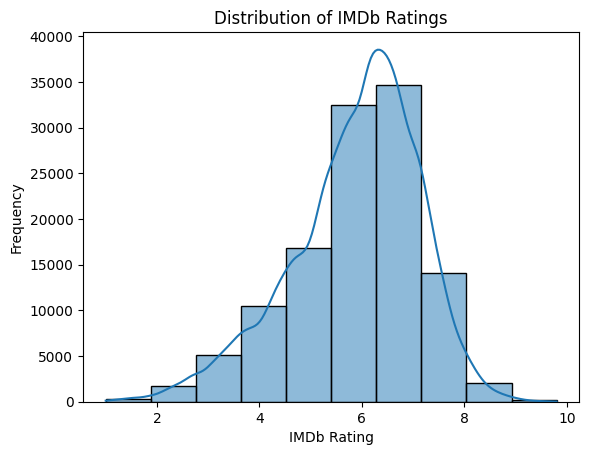

In [25]:
# Check the distribution of IMDb ratings
sns.histplot(movies_df_cleaned['IMDB Rating'], bins=10, kde=True)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


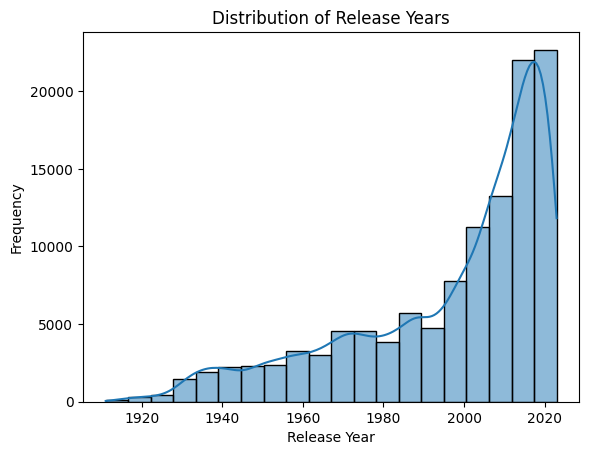

In [26]:
# Check the distribution of release years
sns.histplot(movies_df_cleaned['Release Year'], bins=20, kde=True)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

In [27]:
# Top 10 movies with the highest IMDb ratings
top_rated_movies = movies_df_cleaned.sort_values(by='IMDB Rating', ascending=False).head(10)
top_rated_movies[['Title', 'IMDB Rating']]

,Title,IMDB Rating
2640,Ardhambardha Premakathe,9.8
97131,Days of Géants,9.7
2722,Mukalpparappu,9.7
13935,Wheels of War,9.6
25502,Grinders,9.6
31170,"Odazivam Ti se, Boze",9.6
2444,Nimmellara Aashirvada,9.6
3706,Cuento de Primavera: A Spring Tale,9.6
114206,Svet Koji Nestaje,9.5
106256,Devara Kanassu,9.5


In [28]:
# Top 10 movies with the most rating counts
most_rated_movies = movies_df_cleaned.sort_values(by='Rating Count', ascending=False).head(10)
most_rated_movies[['Title', 'Rating Count']]

,Title,Rating Count
84105,Shavi Raindi,2900000
55976,Gaqceva shoushenkidan,2900000
102423,Dasatskisi,2600000
55520,Forrest Gump,2300000
61716,Fight Club,2300000
55890,Makulatura,2200000
60389,The Matrix,2100000
86808,Interstelari,2100000
63917,The Lord of the Rings: The Return of the King,2000000
39770,Natlimama,2000000


In [29]:
# Count of movies per genre
genre_counts = movies_df_cleaned['Genres'].str.split('|').explode().value_counts()
genre_counts

Genres
Drama          63355
Comedy         37769
Romance        18067
Action         16514
Crime          15193
Thriller       15182
Horror         13224
Adventure       9800
Mystery         7516
Documentary     6183
Family          5472
Fantasy         5026
Sci-Fi          4484
Biography       4060
History         3674
War             2939
Animation       2836
Music           2742
Musical         2474
Western         2427
Sport           1723
Film-Noir        818
News             107
Reality-TV         4
Talk-Show          1
Name: count, dtype: int64

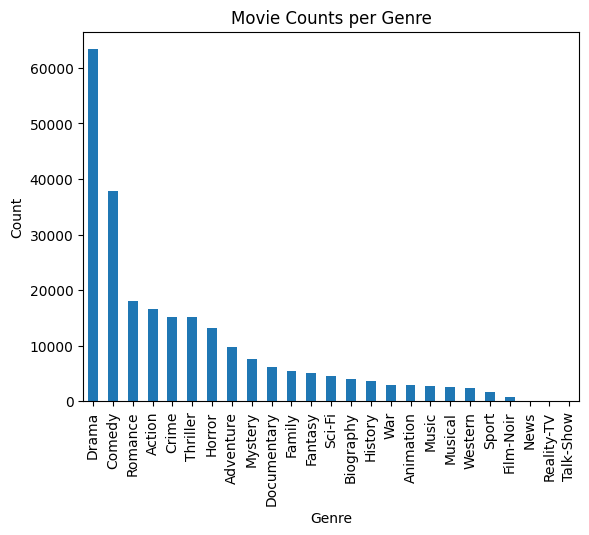

In [30]:
# Bar plot of movie counts per genre
genre_counts.plot(kind='bar')
plt.title('Movie Counts per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [31]:
# Top 10 directors with the most movies
top_directors = movies_df_cleaned['Primary Director'].value_counts().head(10)
top_directors

Primary Director
Jesús Franco        108
Lesley Selander      99
Michael Curtiz       95
Joseph Kane          91
William Beaudine     90
Lloyd Bacon          82
John Ford            80
Richard Thorpe       79
Sam Newfield         76
Cheh Chang           71
Name: count, dtype: int64

In [32]:
# Top 10 stars with the most movies
top_stars = movies_df_cleaned['Primary Star'].value_counts().head(10)
top_stars

Primary Star
Mohanlal            173
Mammootty           139
John Wayne          116
Amitabh Bachchan    112
Akshay Kumar        100
Eric Roberts         96
Cüneyt Arkin         93
Andy Lau             88
William Boyd         83
Nicolas Cage         79
Name: count, dtype: int64

In [33]:
# Top 10 stars with the most movies
top_stars = movies_df_cleaned['Primary Star'].value_counts().head(10)
top_stars

Primary Star
Mohanlal            173
Mammootty           139
John Wayne          116
Amitabh Bachchan    112
Akshay Kumar        100
Eric Roberts         96
Cüneyt Arkin         93
Andy Lau             88
William Boyd         83
Nicolas Cage         79
Name: count, dtype: int64

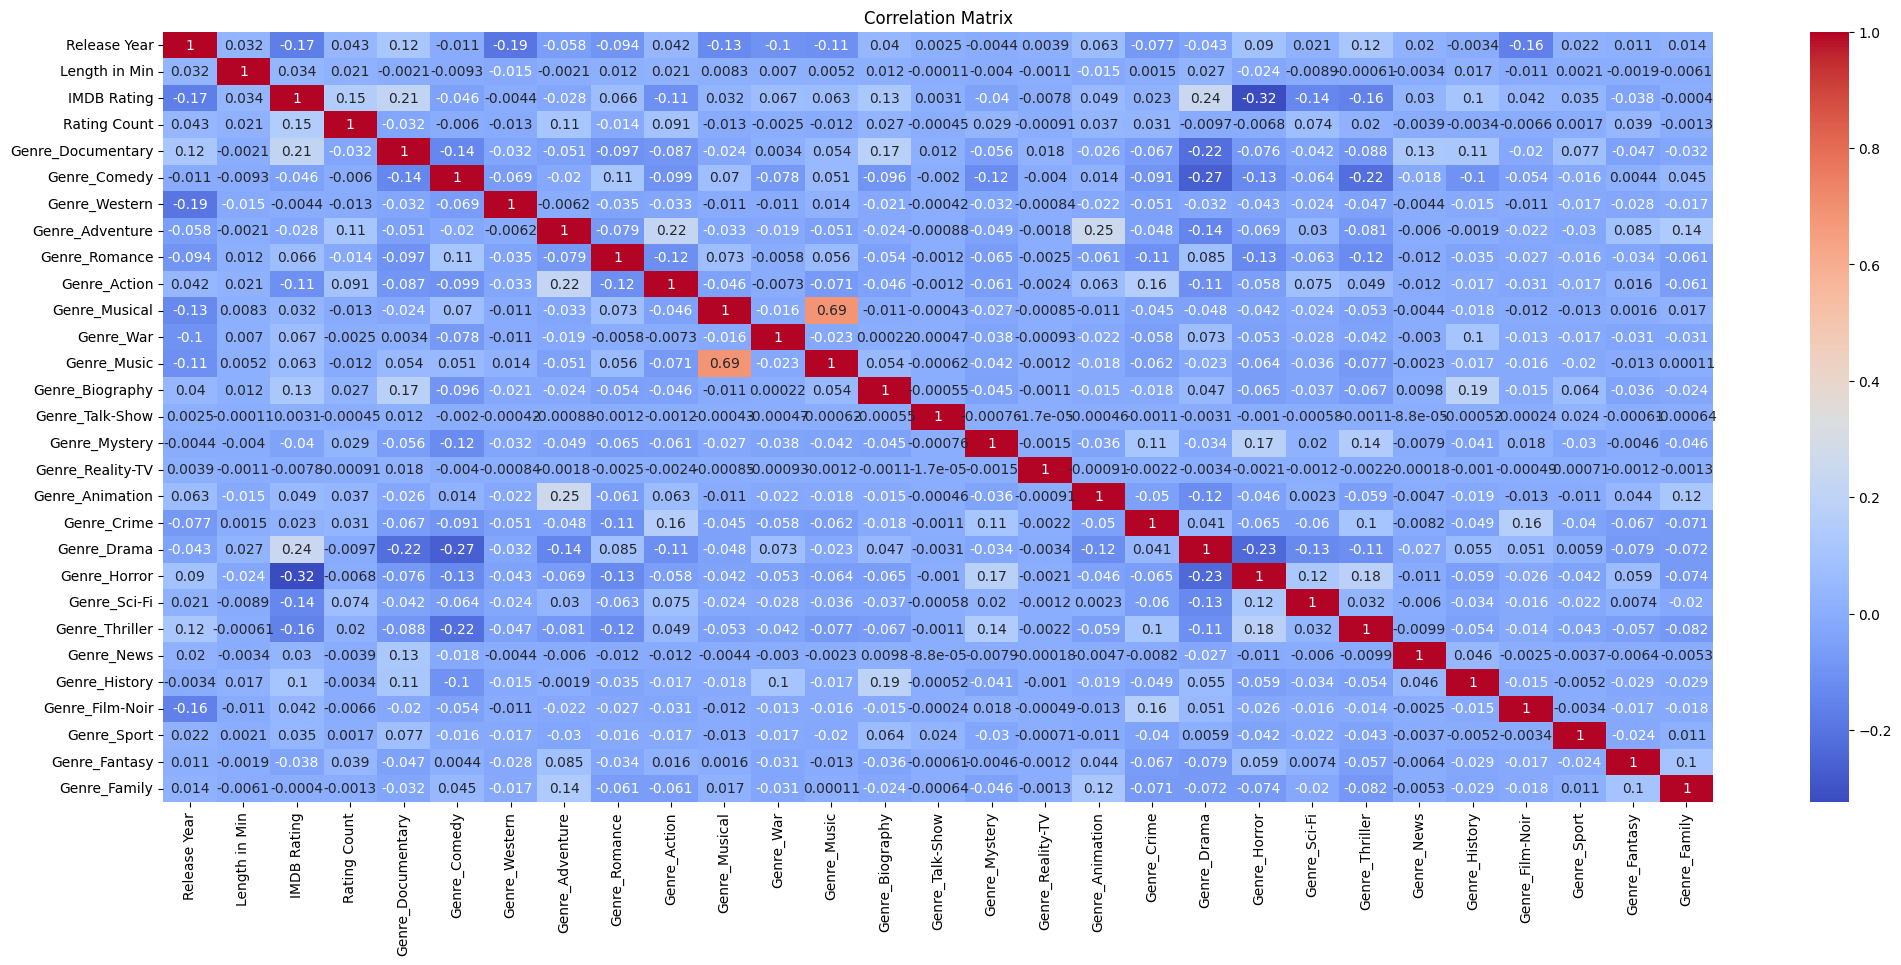

In [34]:
# Correlation matrix for numerical variables
numerical_cols = movies_df_cleaned.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = movies_df_cleaned[numerical_cols].corr()
plt.figure(figsize=(25, 10))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

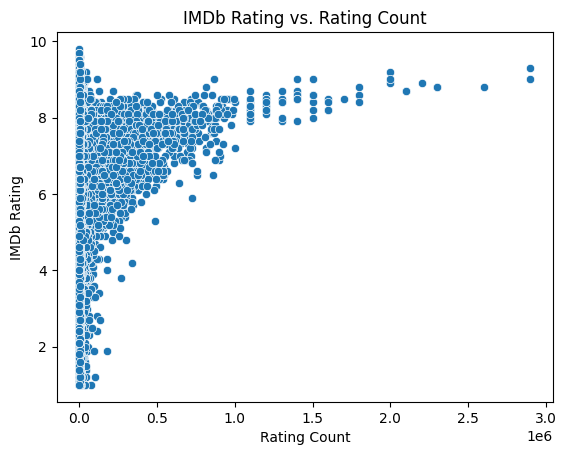

In [35]:
# Scatter plot of IMDb Rating vs Rating Count
sns.scatterplot(x='Rating Count', y='IMDB Rating', data=movies_df_cleaned)
plt.title('IMDb Rating vs. Rating Count')
plt.xlabel('Rating Count')
plt.ylabel('IMDb Rating')
plt.show()

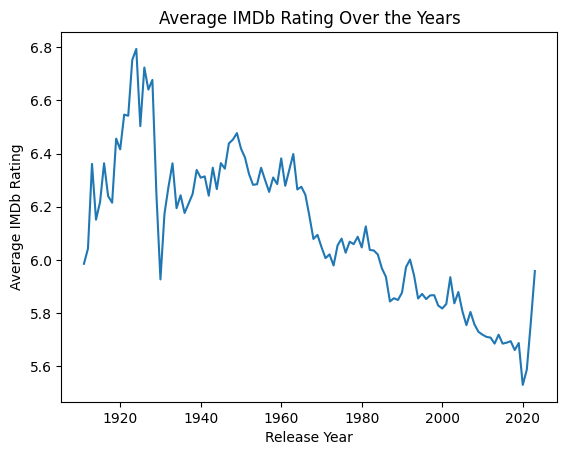

In [36]:
# Average IMDb rating over the years
avg_rating_by_year = movies_df_cleaned.groupby('Release Year')['IMDB Rating'].mean()
avg_rating_by_year.plot(kind='line')
plt.title('Average IMDb Rating Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average IMDb Rating')
plt.show()

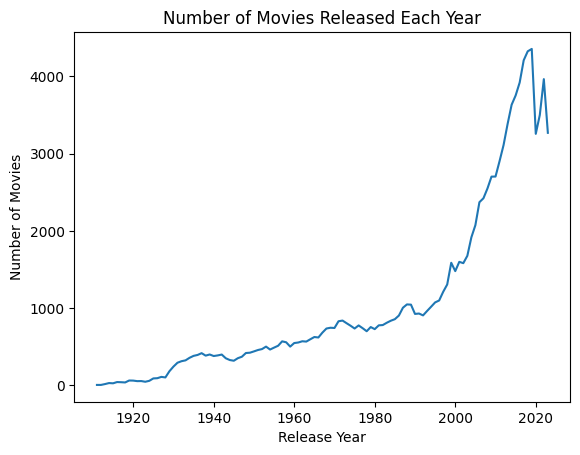

In [37]:
# Number of movies released each year
movies_per_year = movies_df_cleaned['Release Year'].value_counts().sort_index()
movies_per_year.plot(kind='line')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()

In [38]:
# Top 10 longest movies
longest_movies = movies_df_cleaned.sort_values(by='Length in Min', ascending=False).head(10)
longest_movies[['Title', 'Length in Min']]

,Title,Length in Min
8519,Ambiancé,43200
73041,The Cure for Insomnia,5220
64783,****,1500
117227,The Clock,1440
38,The Hazards of Helen,1428
50968,Resan,873
29702,La flor,808
69276,"Out 1, noli me tangere",776
25385,Europa: The Last Battle,746
80700,Ebolusyon ng isang pamilyang Pilipino,625


In [39]:
# Top 10 shortest movies
shortest_movies = movies_df_cleaned.sort_values(by='Length in Min', ascending=True).head(10)
shortest_movies[['Title', 'Length in Min']]

,Title,Length in Min
60661,Frauennot - Frauenglück,21
74351,EPCOT,26
107555,Raised on Porn,36
121497,Dark Cove,39
124145,Meghan Markle: Unforgiven,43
80680,"Ydessa, les ours et etc...",44
93381,"1917 : Il était une fois, la Révolution",44
120062,Depp VS Heard: The Verdict,44
92483,Eyewitness: D-Day,44
18942,Voyage of Time: The IMAX Experience,44


In [40]:
# Movies with IMDb rating higher than 8.0
high_rated_movies = movies_df_cleaned[movies_df_cleaned['IMDB Rating'] > 8.0]
high_rated_movies[['Title', 'IMDB Rating']]

,Title,IMDB Rating
134,On Dangerous Ground,8.5
166,Cecilia of the Pink Roses,8.5
274,Der Klosterjäger,8.2
331,The Kid,8.2
442,Safety Last!,8.1
...,...,...
126453,John Farnham: Finding the Voice,8.1
126555,Até Que a Vida Nos Separe: Uma Biografia de Ne...,8.3
126567,Ego: The Michael Gudinski Story,8.1
126573,Jersey Number 10,8.2


In [41]:
# Movies with less than 100 rating counts
low_rated_movies = movies_df_cleaned[movies_df_cleaned['Rating Count'] < 100]
low_rated_movies[['Title', 'Rating Count']]

,Title,Rating Count
25590,Bruno,99
31370,DTC -Yukemuri Junjou Hen- from HiGH & LOW,99
66841,Ôsaka monogatari,99
112747,Keibetsu,99


In [42]:
# Average IMDb rating for each genre
genre_avg_rating = movies_df_cleaned.groupby('Genres')['IMDB Rating'].mean()
genre_avg_rating

Genres
Action                        4.876335
Action|Adventure              5.259130
Action|Adventure|Biography    6.407500
Action|Adventure|Comedy       5.430254
Action|Adventure|Crime        5.386834
                                ...   
Western|Adventure|Drama       6.800000
Western|Comedy                5.183333
Western|Comedy|Drama          5.900000
Western|Crime|Thriller        7.100000
Western|Drama                 5.200000
Name: IMDB Rating, Length: 1374, dtype: float64

In [43]:
# Most common genre combinations
common_genre_combinations = movies_df_cleaned['Genres'].value_counts().head(10)
common_genre_combinations

Genres
Drama                   16230
Comedy                   9171
Comedy|Drama             5287
Drama|Romance            4596
Comedy|Romance           3218
Comedy|Drama|Romance     3074
Documentary              3060
Horror                   2977
Action|Crime|Drama       1871
Crime|Drama              1777
Name: count, dtype: int64

In [44]:
# Average IMDb rating of movies by top directors
top_directors = top_directors.index.tolist()
top_directors_avg_rating = movies_df_cleaned[movies_df_cleaned['Primary Director'].isin(top_directors)]
top_directors_avg_rating = top_directors_avg_rating.groupby('Primary Director')['IMDB Rating'].mean().sort_values(ascending=False)
top_directors_avg_rating

Primary Director
John Ford           6.655000
Michael Curtiz      6.509474
Cheh Chang          6.463380
Lloyd Bacon         6.180488
Richard Thorpe      6.094937
Lesley Selander     6.058586
Joseph Kane         5.928571
William Beaudine    5.801111
Sam Newfield        5.310526
Jesús Franco        4.620370
Name: IMDB Rating, dtype: float64

In [45]:
# Number of movies directed by top directors
top_directors_movie_count = movies_df_cleaned[movies_df_cleaned['Primary Director'].isin(top_directors)]
top_directors_movie_count = top_directors_movie_count.groupby('Primary Director')['Title'].count().sort_values(ascending=False)
top_directors_movie_count

Primary Director
Jesús Franco        108
Lesley Selander      99
Michael Curtiz       95
Joseph Kane          91
William Beaudine     90
Lloyd Bacon          82
John Ford            80
Richard Thorpe       79
Sam Newfield         76
Cheh Chang           71
Name: Title, dtype: int64

In [46]:
# Average IMDb rating of movies by top stars
top_stars = top_stars.index.tolist()
top_stars_avg_rating = movies_df_cleaned[movies_df_cleaned['Primary Star'].isin(top_stars)]
top_stars_avg_rating = top_stars_avg_rating.groupby('Primary Star')['IMDB Rating'].mean().sort_values(ascending=False)
top_stars_avg_rating

Primary Star
Mohanlal            6.587283
William Boyd        6.375904
Mammootty           6.338849
John Wayne          6.212931
Amitabh Bachchan    6.183929
Andy Lau            6.012500
Cüneyt Arkin        5.769892
Nicolas Cage        5.743038
Akshay Kumar        5.432000
Eric Roberts        4.255208
Name: IMDB Rating, dtype: float64

In [47]:
# Number of movies featuring top stars
top_stars_movie_count = movies_df_cleaned[movies_df_cleaned['Primary Star'].isin(top_stars)]
top_stars_movie_count = top_stars_movie_count.groupby('Primary Star')['Title'].count().sort_values(ascending=False)
top_stars_movie_count

Primary Star
Mohanlal            173
Mammootty           139
John Wayne          116
Amitabh Bachchan    112
Akshay Kumar        100
Eric Roberts         96
Cüneyt Arkin         93
Andy Lau             88
William Boyd         83
Nicolas Cage         79
Name: Title, dtype: int64

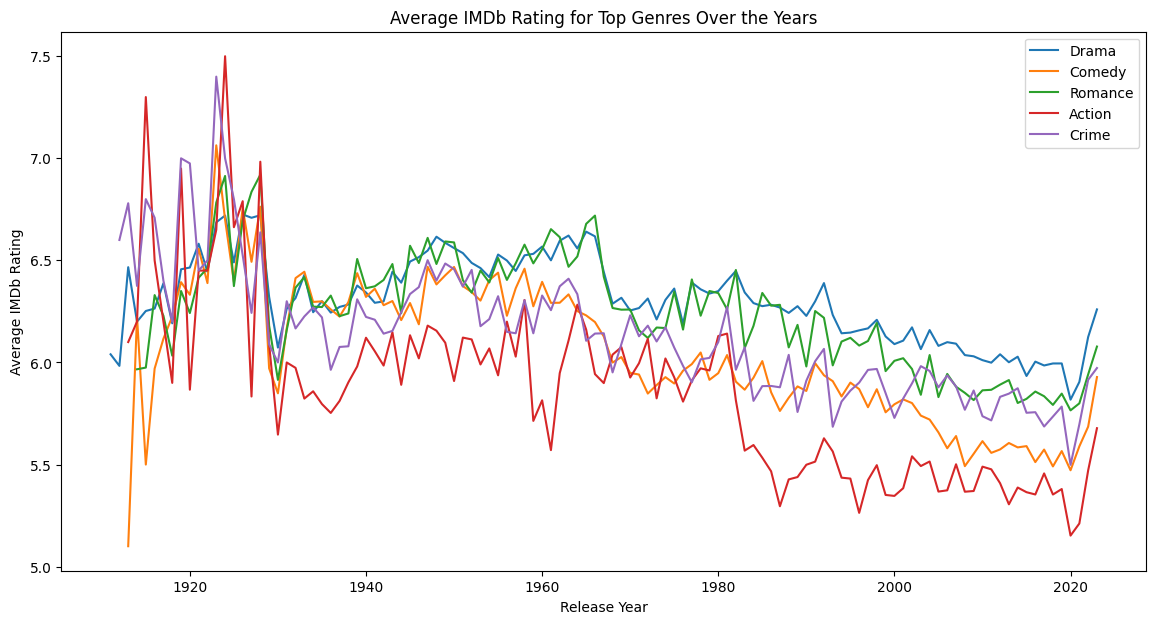

In [48]:
# top_genres = genre_counts.head(5).index.tolist()
top_genres = genre_counts.head(5).index.tolist()
plt.figure(figsize=(14, 7))  
for genre in top_genres:
    genre_data = movies_df_cleaned[movies_df_cleaned['Genres'].str.contains(genre)]
    avg_rating_by_year = genre_data.groupby('Release Year')['IMDB Rating'].mean()
    avg_rating_by_year.plot(kind='line', label=genre)

plt.legend()
plt.title('Average IMDb Rating for Top Genres Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average IMDb Rating')
plt.show()

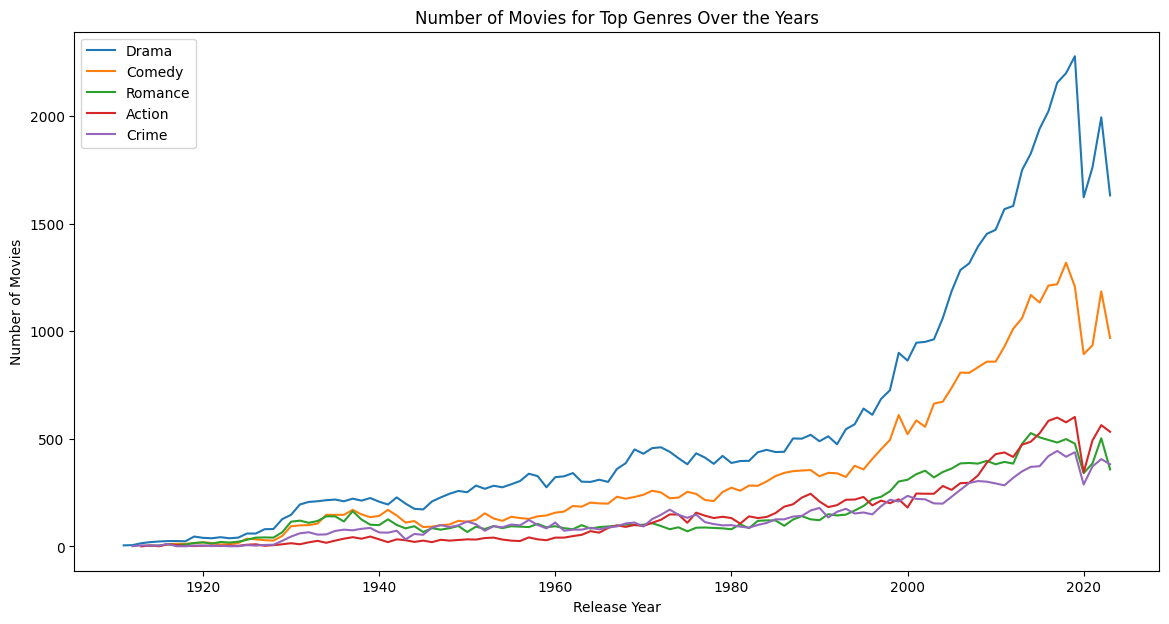

In [49]:
# Trend of number of movies for top genres over the years
plt.figure(figsize=(14, 7))
for genre in top_genres:
    genre_data = movies_df_cleaned[movies_df_cleaned['Genres'].str.contains(genre)]
    movies_per_year = genre_data['Release Year'].value_counts().sort_index()
    movies_per_year.plot(kind='line', label=genre)

plt.legend()
plt.title('Number of Movies for Top Genres Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()

In [50]:
# What are the top 5 movies with the highest IMDb rating?
movies_df_cleaned['Decade'] = (movies_df_cleaned['Release Year'] // 10) * 10
movies_per_decade = movies_df_cleaned['Decade'].value_counts().sort_index()
print(movies_per_decade)

Decade
1910      280
1920      868
1930     3518
1940     3740
1950     4976
1960     6259
1970     7707
1980     8803
1990    11029
2000    20381
2010    36301
2020    13993
Name: count, dtype: int64


In [51]:
# What are the top 5 movies with the lowest IMDb rating?
top_5_lowest_rated = movies_df_cleaned.sort_values(by='IMDB Rating', ascending=True).head(5)
print(top_5_lowest_rated[['Title', 'IMDB Rating']])

                                      Title  IMDB Rating
4756                                 Ryûsei          1.0
31171                           Krv i mosus          1.0
108314                     Cumali Ceber 666          1.0
100868                     Hearts Are Trump          1.0
90214   Konjaku monogatari: The new edition          1.0


In [52]:
# What is the average length of movies for each genre?
avg_length_by_genre = movies_df_cleaned.groupby('Genres')['Length in Min'].mean().sort_values(ascending=False)
avg_length_by_genre

Genres
Fantasy|Adventure|Action        203.0
Drama|Action|Musical            189.0
Action|Musical|War              184.0
Fantasy|Thriller|Action         180.0
Action|Family|Horror            177.5
                                ...  
Animation|Romance                50.0
Animation|Biography|History      49.0
Sci-Fi|Adventure|Action          48.0
Animation|Adventure|Musical      46.0
Documentary|Adventure|Sci-Fi     45.0
Name: Length in Min, Length: 1374, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


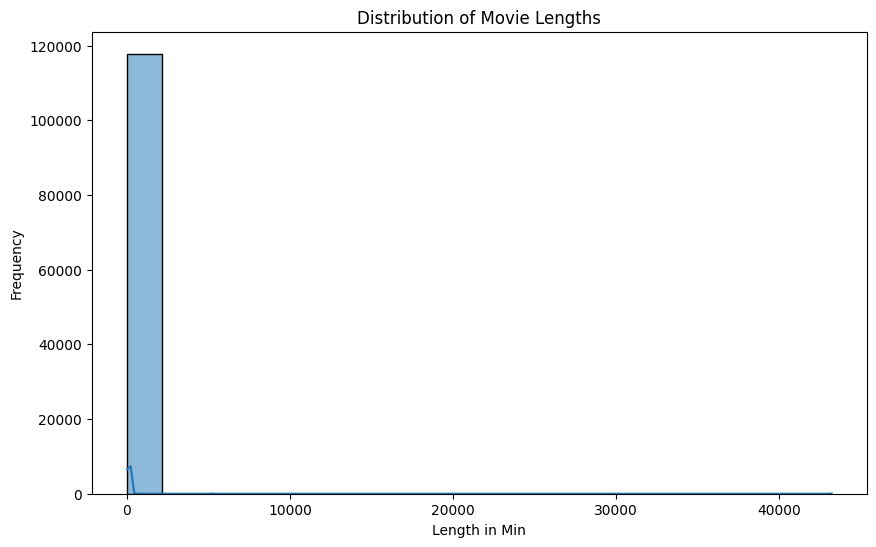

In [53]:
# What is the distribution of movie lengths?
plt.figure(figsize=(10, 6))
sns.histplot(movies_df_cleaned['Length in Min'], bins=20, kde=True)
plt.title('Distribution of Movie Lengths')
plt.xlabel('Length in Min')
plt.ylabel('Frequency')
plt.show()

In [54]:
# What is the average IMDb rating by release year?
avg_rating_by_year = movies_df_cleaned.groupby('Release Year')['IMDB Rating'].mean()
print(avg_rating_by_year)

Release Year
1911    5.985714
1912    6.042857
1913    6.361111
1914    6.151613
1915    6.217857
          ...   
2019    5.687879
2020    5.530396
2021    5.588032
2022    5.765750
2023    5.958379
Name: IMDB Rating, Length: 113, dtype: float64


In [55]:
# What is the correlation between IMDb rating and movie length
correlation_length_rating = movies_df_cleaned['IMDB Rating'].corr(movies_df_cleaned['Length in Min'])
print("Correlation between IMDb rating and movie length:", correlation_length_rating)

Correlation between IMDb rating and movie length: 0.03422173780906649


In [56]:
# What are the top 5 most common words in movie titles?
from collections import Counter
import re
title_words = ' '.join(movies_df_cleaned['Title']).lower()
title_words = re.findall(r'\b\w+\b', title_words)
most_common_words = Counter(title_words).most_common(5)
print(most_common_words)

[('the', 18873), ('of', 6175), ('a', 3807), ('la', 2973), ('de', 2537)]


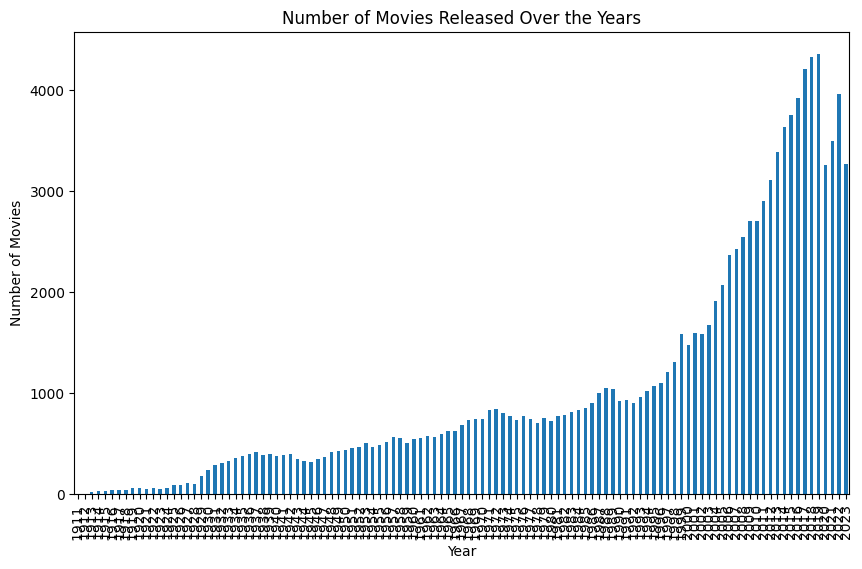

In [57]:
# How does the number of movies released change over the years?
movies_per_year = movies_df_cleaned['Release Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
movies_per_year.plot(kind='bar')
plt.title('Number of Movies Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

In [58]:
# What are the top 5 most frequent words in movie plots?
plot_words = ' '.join(movies_df_cleaned['Plot']).lower()
plot_words = re.findall(r'\b\w+\b', plot_words)
most_common_plot_words = Counter(plot_words).most_common(5)
print(most_common_plot_words)

[('a', 560172), ('the', 532128), ('to', 333001), ('of', 310104), ('and', 298785)]


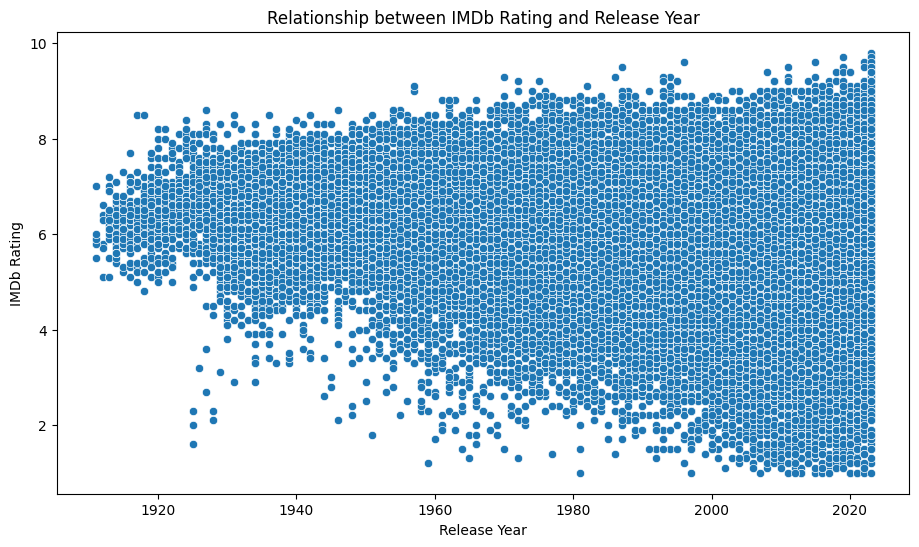

In [59]:
# What is the relationship between IMDb rating and release year?
plt.figure(figsize=(11, 6))
sns.scatterplot(x='Release Year', y='IMDB Rating', data=movies_df_cleaned)
plt.title('Relationship between IMDb Rating and Release Year')
plt.xlabel('Release Year')
plt.ylabel('IMDb Rating')
plt.show()

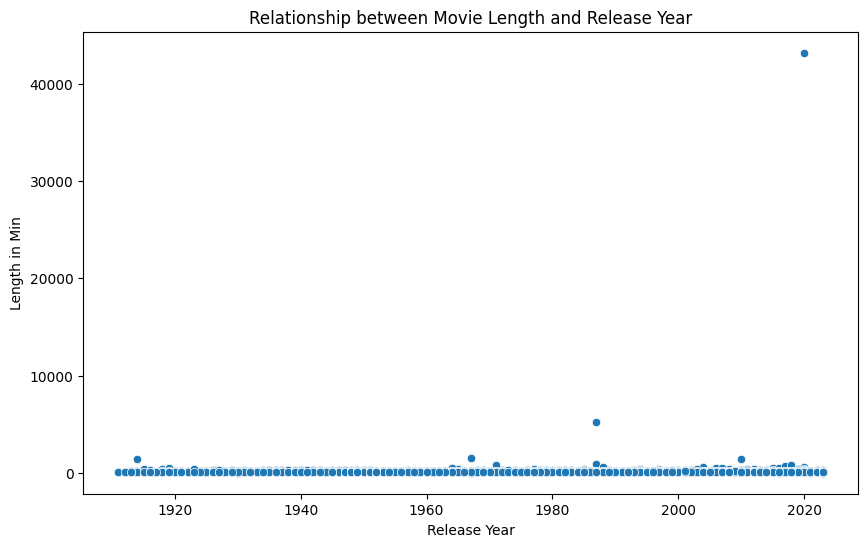

In [60]:
# What is the relationship between movie length and release year?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Release Year', y='Length in Min', data=movies_df_cleaned)
plt.title('Relationship between Movie Length and Release Year')
plt.xlabel('Release Year')
plt.ylabel('Length in Min')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


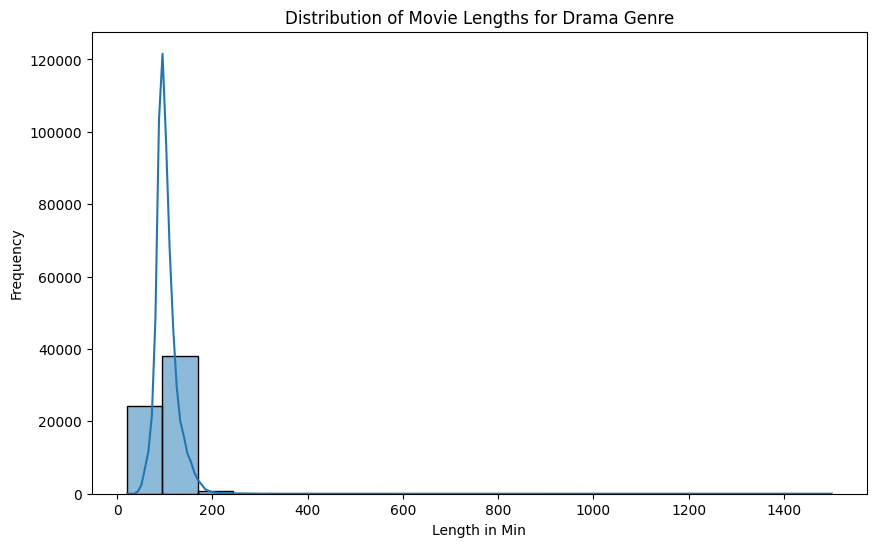

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


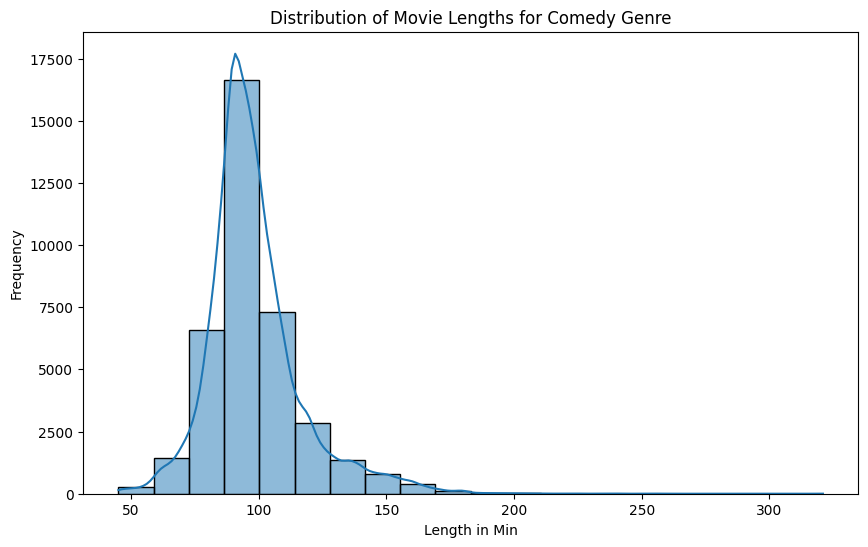

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


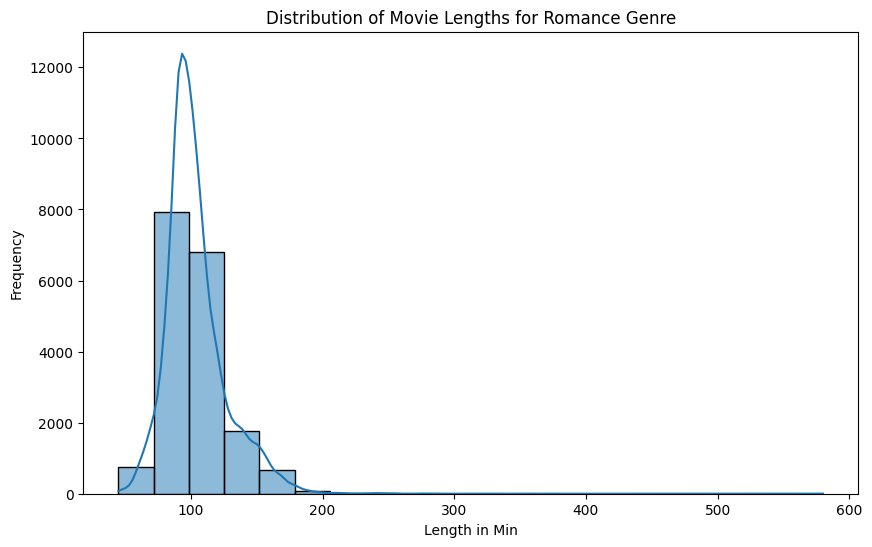

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


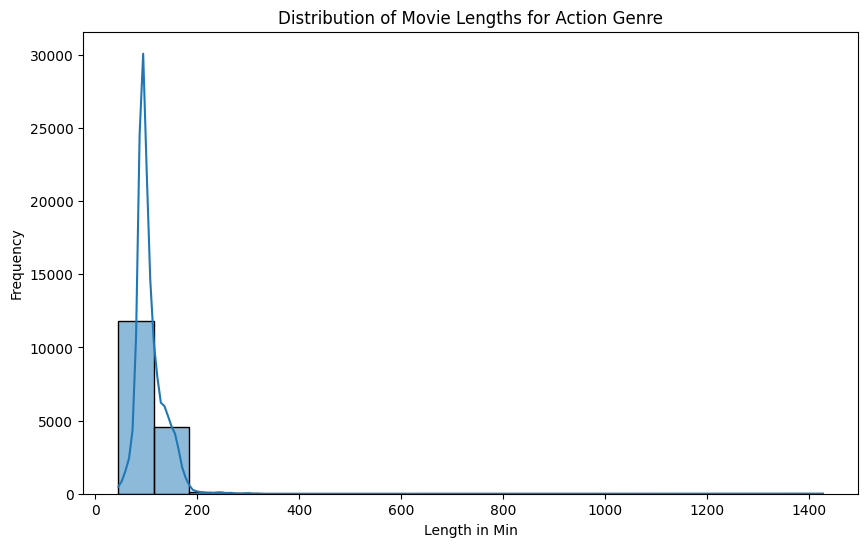

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


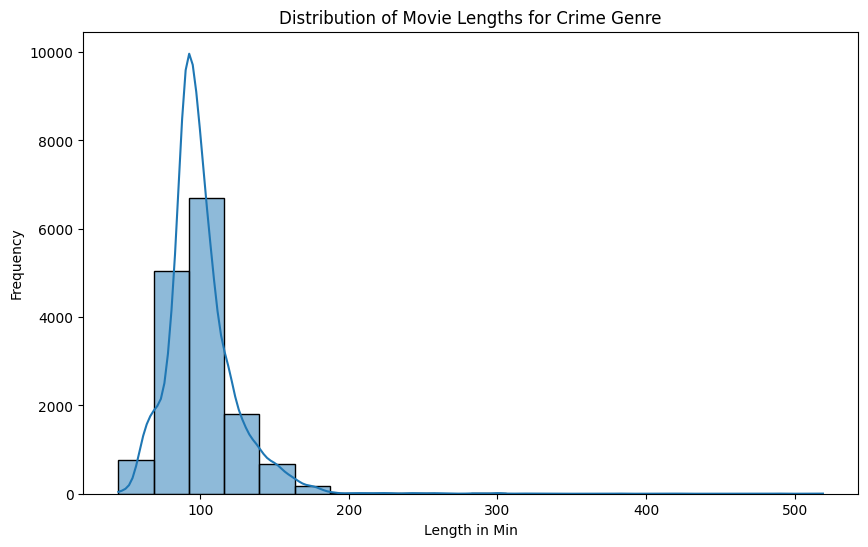

In [61]:
# What is the distribution of movie lengths for top genres?
for genre in top_genres:
    genre_data = movies_df_cleaned[movies_df_cleaned['Genres'].str.contains(genre)]
    plt.figure(figsize=(10, 6))
    sns.histplot(genre_data['Length in Min'], bins=20, kde=True)
    plt.title(f'Distribution of Movie Lengths for {genre} Genre')
    plt.xlabel('Length in Min')
    plt.ylabel('Frequency')
    plt.show()

In [62]:
# What are the top 5 most frequent words in director names?
director_names = ' '.join(movies_df_cleaned['Primary Director']).lower()
director_words = re.findall(r'\b\w+\b', director_names)
most_common_director_words = Counter(director_words).most_common(5)
print(most_common_director_words)

[('john', 1940), ('david', 1617), ('michael', 1601), ('robert', 1399), ('william', 1044)]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


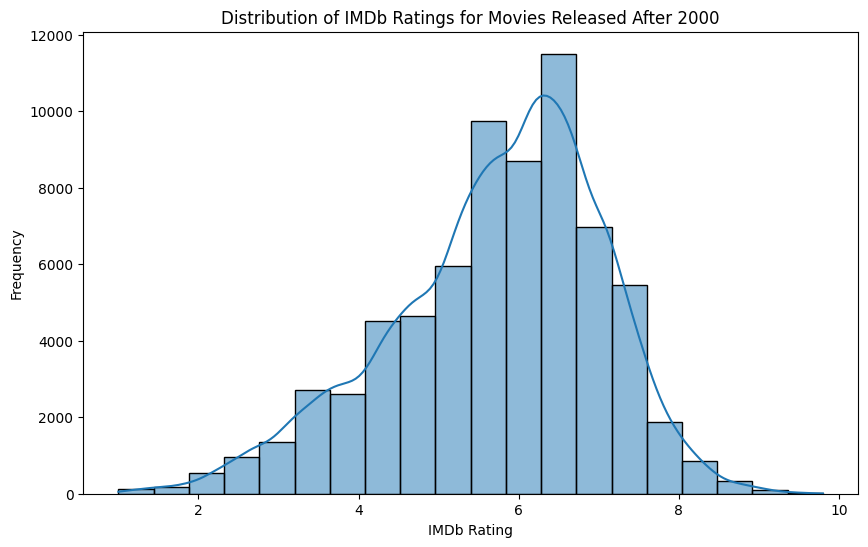

In [63]:
# What is the distribution of IMDb ratings for movies released after 2000?
movies_after_2000 = movies_df_cleaned[movies_df_cleaned['Release Year'] > 2000]
plt.figure(figsize=(10, 6))
sns.histplot(movies_after_2000['IMDB Rating'], bins=20, kde=True)
plt.title('Distribution of IMDb Ratings for Movies Released After 2000')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()

In [64]:
# What is the average IMDb rating for movies released before 2000?
avg_rating_before_2000 = movies_df_cleaned[movies_df_cleaned['Release Year'] < 2000]['IMDB Rating'].mean()
print("Average IMDb Rating for Movies Released Before 2000:", avg_rating_before_2000)

Average IMDb Rating for Movies Released Before 2000: 6.095515048749471


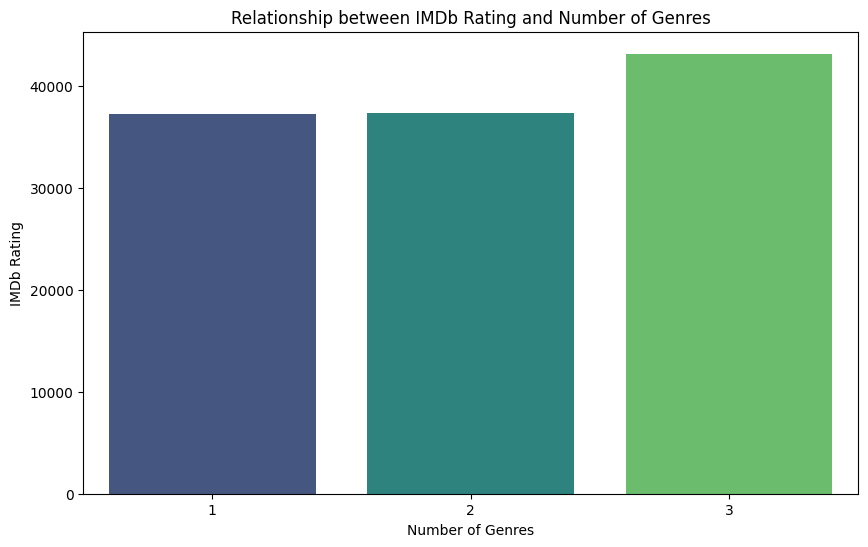

In [65]:
# What is the relationship between IMDb rating and number of genres?
movies_df_cleaned['Genre Count'] = movies_df_cleaned['Genres'].apply(lambda x: len(x.split('|')))
plt.figure(figsize=(10, 6))
sns.countplot(x='Genre Count', data=movies_df_cleaned, palette='viridis')
plt.title('Relationship between IMDb Rating and Number of Genres')
plt.xlabel('Number of Genres')
plt.ylabel('IMDb Rating')
plt.show()